# Implementando un modelo de regresión lineal

La finalidad de este ejercicio es encontrar la línea recta que mejor se ajuste a los datos suministrados.

Datos para el desarrollo del problema:

### Hipótesis:  $h_w = w_0 + w_1x$
La hipótesis es la curva que busca representar los datos, como se trata de una regresión lineal, la curva corresponde a una recta de la forma $y = mx + b$.
### Parametros: $w_0, w_1$
Los parámetros son los valores que modifican la curva, en este caso corresponden a la pendiente de la recta y su punto de corte con el eje $y$.
### Función de pérdida: $J(w_0, w_1) = \frac{1}{2m}\sum_{i=1}^{m}(h_w(x^{(i)})-y^{(i)})^2$
La función que determina cual es el error del modelo, corresponde a la **mitad del error cuadrático medio**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets._samples_generator import make_regression

In [2]:
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)

m = 200

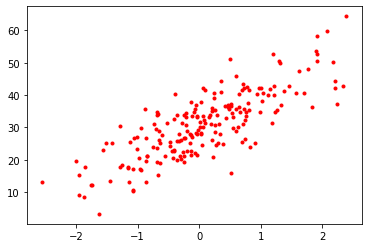

In [3]:
plt.scatter(X, y, c="red", marker=".")

In [4]:
def h(X, w):
    return (w[1] * np.array(X[:, 0]) + w[0])

In [5]:
def cost(w, X, y):
    return (.5 / m) * np.sum(np.square(h(X, w) - np.array(y)))

In [6]:
def grad(w, X, y):
    g = [0] * 2
    g[0] = (1 / m) * np.sum(h(X, w) - np.array(y))
    g[1] = (1 / m) * np.sum((h(X, w) - np.array(y)) * np.array(X[:, 0]))
    return g

In [7]:
def descent(w_new, w_prev, lr):
    print('initial w = ', w_prev)
    print('initial cost = ', cost(w_prev, X, y))
    print('\nLearning process')
    j = 0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr * grad(w_prev, X, y)[0]
        w1 = w_prev[1] - lr * grad(w_prev, X, y)[1]
        w_new = [w0, w1]
        print('w = ', w_new)
        print('cost = ', cost(w_new, X, y))
        if (w_new[0] - w_prev[0]) ** 2 + (w_new[1] - w_prev[1]) ** 2 <= pow(10, -6):
            return w_new
        if j > 500:
            return w_new
        j += 1


In [8]:
w = [5, -3]

w = descent(w, w, .1)
print('\nfinal w = ', w)
print('final cost = ', cost(w, X, y))

initial w =  [5, -3]
initial cost =  421.6616345483829

Learning process
w =  [7.6104403109258705, -1.7366929578005428]
cost =  341.95131999064535
w =  [9.950482151049, -0.6101417588286613]
cost =  278.02511711436614
w =  [12.048178006695508, 0.394367480335138]
cost =  226.75660115249943
w =  [13.928666163316294, 1.2899732450212915]
cost =  185.63876005477658
w =  [15.614473790962268, 2.088406636900821]
cost =  152.6612502209177
w =  [17.12578847711162, 2.800141526961584]
cost =  126.21197977229772
w =  [18.48070149437303, 3.4345287409182257]
cost =  104.99819700047865
w =  [19.69542574781269, 3.999915970560114]
cost =  87.98321767190184
w =  [20.784491039638176, 4.503754925322787]
cost =  74.33569135180143
w =  [21.760919013986175, 4.952697078081662]
cost =  63.38892142457693
w =  [22.636379898260255, 5.352679215815104]
cost =  54.608246166107236
w =  [23.421332936855855, 5.708999877580807]
cost =  47.56488322384624
w =  [24.12515221551065, 6.026387647596533]
cost =  41.91495655051670

In [9]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)


def my_formula(x):
    return w[1] * x + w[0]

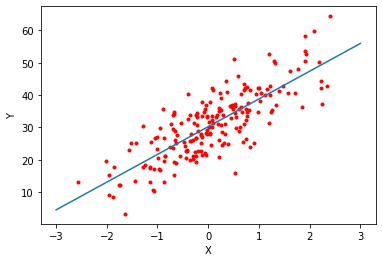

In [10]:
plt.scatter(X, y, c="red", marker=".")
graph(my_formula, range(-3, 4))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()